# Bioviersity of National Parks 

## Objectives

Discover if there is or not any pattern or theme on species to become endangered

## Data loading and first inspection

In [2]:
#libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
obs=pd.read_csv("observations.csv")
speInfo=pd.read_csv("species_info.csv")
print(obs.head())
print(obs.info())
parks=obs.park_name.unique()
obs=obs.rename(columns={'scientific_name':'scname'})

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [4]:
speInfo=speInfo.rename(columns={'scientific_name':'scname','conservation_status':'status'})
print(speInfo.head())
print(speInfo.info())
categories=speInfo['category'].unique()

  category                         scname  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names status  
0                           Gapper's Red-Backed Vole    NaN  
1                              American Bison, Bison    NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...    NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)    NaN  
4                                      Wapiti Or Elk    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      5824 non-null   object
 1   scname        5824 non-null   object
 2   common_names  5824 non-null   object
 3   status        191 non-null    object

In [5]:
status=speInfo['status'].unique() #missing values of status considered as not in danger
speInfo=speInfo.sort_values('scname')
speInfo=speInfo.drop_duplicates(subset='scname')



#### Parks

In [6]:
print(parks)

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [7]:
print(obs.groupby('park_name').size())

park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64


#### Categories

In [11]:
print(categories)

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [12]:
print(speInfo.groupby('category').size())

category
Amphibian              79
Bird                  488
Fish                  125
Mammal                176
Nonvascular Plant     333
Reptile                78
Vascular Plant       4262
dtype: int64


#### Status

In [13]:
print(status)

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Nan dat will be considered as no-risk

In [14]:
print("There are " + str(speInfo.status.isna().sum())+" species not in risk")
print(speInfo.groupby('status').size())

There are 5363 species not in risk
status
Endangered             15
In Recovery             3
Species of Concern    151
Threatened              9
dtype: int64


From the data inspection we realized, there is the same information for all parks, We know the number and names of the the parks, categories and status
## Data Analisys

### Endangered distrubution by category

In [20]:
category_dan=speInfo[['category','status','scname']].dropna(subset='status').groupby(['status','category']).scname.count().unstack()

Text(0, 0.5, 'Number of species')

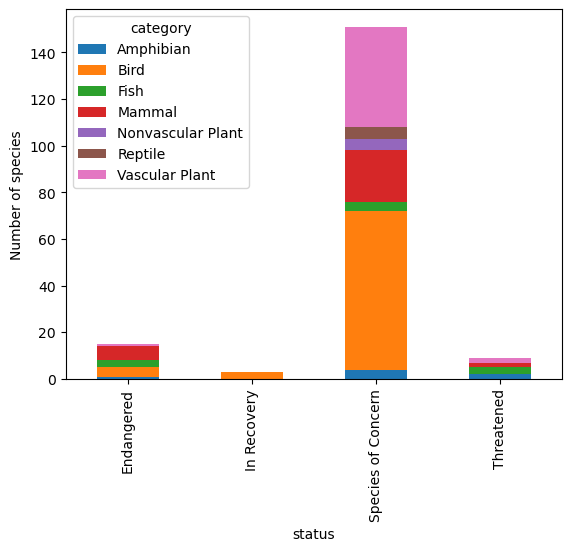

In [24]:
ax=category_dan.plot(kind='bar',stacked=True)
ax.set_ylabel("Number of species")

As we can see there are 3 species on big problems, that are mamals, birds and vascular plants